# Module 3: Assignment C #

------

## 1. Dynamic Progamming Implementation

Implement dynamic programming algorithms for global ([Needleman-Wunsch](https://pubmed.ncbi.nlm.nih.gov/5420325/)) and local ([Smith-Waterman](https://pubmed.ncbi.nlm.nih.gov/7265238)) alignment of protein sequences. The implementation should be a stand alone, command-line application. 


> There is a jupyter notebook in the module that walkthrough a partial implemention of Needleman-Wunsch. Feel free to use this code as a starter, but you do not feel obligated to. You may find it easier to start from scratch so that you can completely understand every aspect of your code or use this to get you started. There are some differences of what is being asked of you here, as to what is implemented (eg. scoring matrix, protein only) in the notebook.

The application should allow the user to read in the sequences from a fasta formatted file, select the type of alignment (local or global).

The application should take parameter from the the command line to set the sequence files, the type of alignment, the scoring matrix and a linear gap penalty. Include the ability to select either the blosum62 or pam250 scoring matrices. The matrices are included as python dictionaries [here]().

An example of running the program is shown below:

```

align.py --seq1 sequence_file.fasta \
         --seq2 different_sequence_file.fasta \ 
         --type global \
         --matrix blosum62 \
         --gap_penalty -2

```

Please use judicious comments throughout your code. 

The program should report the alignment score, the sequence identity and a visual representation of the alignment. For example:

```

seq 1   GCTAGGATAGGCAATTGGCCTAG--T--G
seq 2   ------ATA-GTAATTGGCCT-GCTTGAG
Aligment Score:    3
Sequence Identity: 78%

```

Implement your code in a separate module and provide an example of a command used to execute it. Provide any files needed for the run.

#### execution with some random fasta files:
#### (code in alignments.py)
- python3 alignments.py --seq1 ./data/seq3.fasta --seq2 ./data/seq4.fasta --type global --matrix blosum62 --gap_penalty -2 \
- python3 alignments.py --seq1 ./data/ex3.fasta --seq2 ./data/ex4.fasta --type global --matrix blosum62 --gap_penalty -2

Resources and tools to help test your implementation:

* Neelemen-Wunsch 
  - A general method applicable to the search for similarities in the amino acid sequence of two proteins. Needleman SB, Wunsch CD. [J Mol Biol 1970 Mar;48(3):443-53](http://www.ncbi.nlm.nih.gov/pubmed/5420325?ordinalpos=7&itool=EntrezSystem2.PEntrez.Pubmed.Pubmed_ResultsPanel.Pubmed_DefaultReportPanel.Pubmed_RVDocSum)
  - Online Needleman-Wunsch Alignment Tool: http://rna.informatik.uni-freiburg.de/Teaching/index.jsp?toolName=Needleman-Wunsch

* Smith Waterman
  - Identification of common molecular subsequences. Smith TF, Waterman MS. [J Mol Biol 1981 Mar 25;147(1):195-7]({{site.cdn}}/2015-Autumn/Session3/dayhoff-1978-apss.pdf)
  - Online Smith Waterman Alignment Tool: http://rna.informatik.uni-freiburg.de/Teaching/index.jsp?toolName=Smith-Waterman

## 2.  Statisics of Pairwise Alignments
---------------------------------------

Perform a global sequence alignment of the following sequences:

```
PAWHEAE
HEAGAWGHEE
```
Assume a match score of `1`, a gap penalty of `3` and a substitution score of `-1`.  What is the alignment score?


- PAWHEAE is in data/ex1.fasta \
- HEAGAWGHEE is in data/ex2.fasta

In [1]:
import matplotlib.pyplot as plt
import math 

def global_alignment(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-3):
    '''
    This function creates a score matrix for Needleman-Wunsch (global) algorithm

    Input:
        seq1, seq2 (str): your sequences

    Returns:
        aligned_seq1, aligned_seq2 (str): the optimal alignment of the sequences
        score_matrix: A 2D list (matrix). each cell contains the alignment score for the best possible alignment up to that point
    '''

    rows = len(seq1) + 1
    cols = len(seq2) + 1

    # Initialize the output matrices
    score_matrix = [[0] * cols for _ in range(rows)]

    # Initialize first row and column with gap penalty
    for i in range(rows):
        score_matrix[i][0] = gap_penalty * i
    for j in range(cols):
        score_matrix[0][j] = gap_penalty * j

    # Fill the matrix using the recursion
    for i in range(1, rows):
        for j in range(1, cols):
            match = score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            gap1 = score_matrix[i - 1][j] + gap_penalty
            gap2 = score_matrix[i][j - 1] + gap_penalty
            score_matrix[i][j] = max(match, gap1, gap2)

    # Traceback
    aligned_seq1 = ""
    aligned_seq2 = ""
    i, j = rows-1, cols-1
    while i > 0 or j > 0:
        if i > 0 and j > 0 and score_matrix[i][j] == score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score):
            aligned_seq1 = seq1[i - 1] + aligned_seq1
            aligned_seq2 = seq2[j - 1] + aligned_seq2
            i -= 1
            j -= 1
        elif i > 0 and score_matrix[i][j] == score_matrix[i - 1][j] + gap_penalty:
            aligned_seq1 = seq1[i - 1] + aligned_seq1
            aligned_seq2 = "-" + aligned_seq2
            i -= 1
        else:
            aligned_seq1 = "-" + aligned_seq1
            aligned_seq2 = seq2[j - 1] + aligned_seq2
            j -= 1

    return aligned_seq1, aligned_seq2, score_matrix


seq1 = "PAWHEAE"
seq2 = "HEAGAWGHEE"
aligned_seq1, aligned_seq2, score_matrix = global_alignment(seq1, seq2)
alignment_score = score_matrix[len(seq1)][len(seq2)]
print(f"Alignment:\n{aligned_seq1}\n{aligned_seq2}")
print(f"Alignment Score: {alignment_score}")


Alignment:
---PAWHEAE
HEAGAWGHEE
Alignment Score: -10


#### Or with prior, commmand line:

$ python alignments.py --seq1 ./data/ex1.fasta --seq2 ./data/ex2.fasta --type global --matrix blosum62 --gap_penalty -3

#### Output: 
Alignment: \
---PAWHEAE \
HEAGAWGHEE \
Alignment Score: -10 \
Sequence Identity: 42.86%

How many ways can you uniquely shuffle the sequence `PAWHEAE`? For example: `PAWHEAE`, `PAWHEEA`, `PAWHAEE`, etc.

In [2]:
import math

def unique_shuffles(seq):
    '''
    This function calculates the number of unique shuffles of a sequence.

    Input:
        seq (str): the sequence

    Returns:
        count (int): the number of ways to shuffle the sequence.
    '''
    n = len(seq)

    # count the unique characters
    char_counts = {}
    for char in seq:
        char_counts[char] = char_counts.get(char, 0) + 1

    numerator = math.factorial(n)
    denominator = 1
    for count in char_counts.values():
        # account for repeated characters
        denominator *= math.factorial(count)

    # get unique shuffles
    count = numerator // denominator
    return count

og_seq = 'PAWHEAE'
unique = unique_shuffles(og_seq)
print(f"There are {unique} unique ways to shuffle the sequence '{og_seq}'.")

There are 1260 unique ways to shuffle the sequence 'PAWHEAE'.


Next, generate 100 random sequences with the same amino acid composition as `PAWHEAE`. Perform an alignment of each newly generated sequence to `HEAGAWGHEE` and record the alignment scores. Calculate the Z-score for each alignment and construct a plot using `matplotlib`. Place the Z-score on the x-axis. Include the plot inline below.

In [5]:
import random 
import numpy as np

target_seq = "HEAGAWGHEE"
og_seq = "PAWHEAE"
scores = [] # to hold random alignment scores

# 100 random shuffles
random_sequences = ["".join(random.sample(og_seq, len(og_seq))) for _ in range(100)]

# Compute alignments for each shuffled sequence
for seq in random_sequences:
    aligned_seq1, aligned_seq2, score_matrix = global_alignment(seq, target_seq)
    alignment_score = score_matrix[len(seq)][len(target_seq)]
    scores.append(alignment_score)
    
# Calculate the mean, standard deviation, and then the z-scores of the alignment scores
mean_score = np.mean(scores)
std_dev = np.std(scores)
z_scores = [(score - mean_score) / std_dev for score in scores]

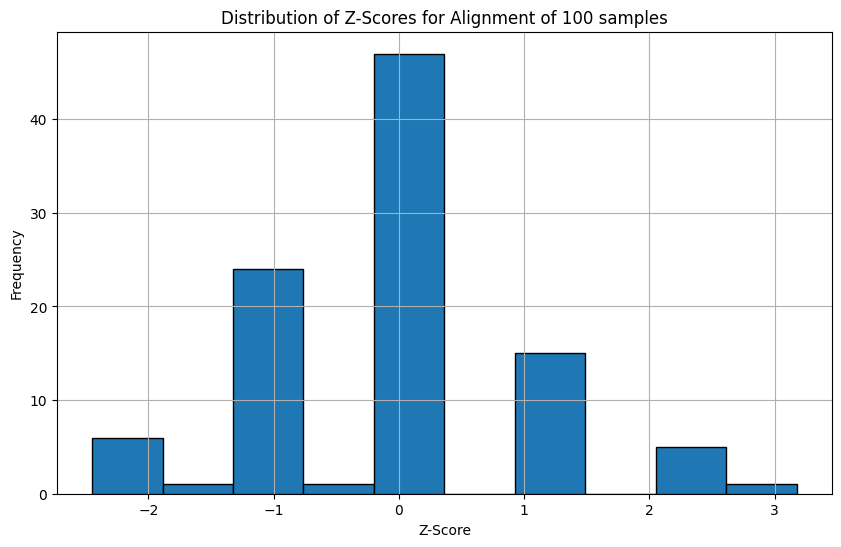

In [6]:
# Plot here
plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=10, edgecolor='black')
plt.title("Distribution of Z-Scores for Alignment of 100 samples")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [7]:
# Perform the alignment for the original sequences
# PAWHEAE and HEAGAWGHEE
aligned_seq1, aligned_seq2, score_matrix = global_alignment(og_seq, target_seq)
og_alignment_score = score_matrix[len(og_seq)][len(target_seq)]

# Calculate the Z-score for the original alignment
og_z_score = (og_alignment_score - mean_score) / std_dev
print(og_z_score)

0.10736246830291389


 What does the Z-score suggest about the significance of the initial alignment your performed?  

The Z-score of 0.107 is very close to zero, so this indicates that the alignment score of the original sequence is very close to the mean of the random alignments. This indicates that the alignment is not very statistically significant. This means that based on the Z-score, the original alignment may not be particularly meaningful or biologically significant.

Are the alignment scores normally distributed?  _You can use SciPy or any other python modules to help._

In [9]:
from scipy import stats

#perform Shapiro-Wilk test for normality
statistic, pvalue = stats.shapiro(scores)

# Display the results
print(f"statistic: {statistic}\np-value: {pvalue}")


statistic: 0.9049842495201623
p-value: 2.4439716601423917e-06


Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test. This means that the alignment scores are not normally distributed.

Repeat the process above, but now generate 1,000 and 10,000 random sequences and calculate the Z-score for each set.  Does the change in number of sequences alter your evaluation of the evolutionary relatedness of the sequences?

### For 1000

In [10]:
# 1000 random shuffles
random_sequences_1000 = ["".join(random.sample(og_seq, len(og_seq))) for _ in range(1000)]
scores_1000 = []

# Compute alignments for each shuffled sequence (for 1000)
for seq in random_sequences_1000:
    aligned_seq1, aligned_seq2, score_matrix = global_alignment(seq, target_seq)
    alignment_score = score_matrix[len(seq)][len(target_seq)]
    scores_1000.append(alignment_score)

mean_1000 = np.mean(scores_1000)
std_dev_1000 = np.std(scores_1000)
z_scores_1000 = [(score - mean_1000) / std_dev_1000 for score in scores_1000]


### For 10000

In [16]:

# 10000 random shuffles
random_sequences_10000 = ["".join(random.sample(og_seq, len(og_seq))) for _ in range(10000)]
scores_10000 = []

# Compute alignments for each shuffled sequence (for 10000)
for seq in random_sequences_10000:
    aligned_seq1, aligned_seq2, score_matrix = global_alignment(seq, target_seq)
    alignment_score = score_matrix[len(seq)][len(target_seq)]
    scores_10000.append(alignment_score)
    
mean_10000 = np.mean(scores_10000)
std_dev_10000 = np.std(scores_10000)
z_scores_10000 = [(score - mean_10000) / std_dev_10000 for score in scores_10000]


In [17]:
# Z-scores for the original sequence for 1000 and 10000
og_z_score_1000 = (og_alignment_score - mean_1000) / std_dev_10000
og_z_score_10000 = (og_alignment_score - mean_10000) / std_dev_10000

print(f"original_z_score_1000: {og_z_score_1000}\noriginal_z_score_10000: {og_z_score_10000}")

original_z_score_1000: -0.10627881221657161
original_z_score_10000: -0.037772064341836074


The Z-scores against the original alignment are:

- For 1,000 random sequences: -0.106
- For 10,000 random sequences: -0.037

These Z-scores are still close to zero and indicate that the alignment score of the original sequence is still not significantly different from the random shuffles, even with a larger set of random sequences. The original alignment still does not appear to be biologically significant.

Considering the wall time for each run, comment of the feasibility for computing the Z-score significance while searching a large database of millions of sequences.

For a database of millions of sequences, this scaling would result in significant computational time so increasing to millions of sequences would increase run time exponentially and would not be realistic.

# 3. Pig, Whale, and Hippo Revisited
---
Redo your experiment from Notebook A using either your SW and NW implementations. Do you get different answers based on the approach used?

#### Files:
- seq1.fasta: Pig
- seq2.fasta: Whale
- seq3.fasta: Hippo

### Using global alignment:

#### Hippo vs Whale:
- $ python alignments.py --seq1 ./data/seq3.fasta --seq2 ./data/seq2.fasta --type global --matrix blosum62 --gap_penalty -3

Alignment Score: 95 \
Sequence Identity: 83.56%

#### Hippo vs Pig:
- $ python alignments.py --seq1 ./data/seq3.fasta --seq2 ./data/seq1.fasta --type global --matrix blosum62 --gap_penalty -3

Alignment Score: 97 \
Sequence Identity: 85.52%

#### Pig vs Whale:
- $ python alignments.py --seq1 ./data/seq3.fasta --seq2 ./data/seq1.fasta --type global --matrix blosum62 --gap_penalty -3

Alignment Score: 83 \
Sequence Identity: 79.45%

Yes, the results are different because they show that Hippo is more closely related to both the pig and the whale (but still moreso pig). This differes from the Hamming approach that claimed that the pippo was not closely related to the pig or whale, but that the pig and whale were similar.

# 4.  Recent Approaches in Sequence Alignemnt
-----------------------------------------------------

Search [PubMed](https://pubmed.ncbi.nlm.nih.gov) and identify a paper on a different sequence alignment method.  Do not use BLAST or FASTA.  Briefly (at a high-level), discuss what is different in these approaches and how they improve on what we have seen with Needleman-Wunch and/or Smith-Waterman.  You answer does not have to be uneccesarily technical, but please provide an understanding example of the improvement it makes. Limit your response to 1 paragragh at most. Share you findings and a link to the paper in the `#showcase` channel.

#### WeIghTed Consensus Hidden Markov Model alignment (WITCH)
https://pubmed.ncbi.nlm.nih.gov/35575747/


WITCH is a newer approach to multiple sequence alignment. Like Needleman-Wunsch and Smith, it is fundamentally concerned with sequence alignment but operates at a higher level of complexity (specifically for multiple sequence alignments rather than pairwise). This approach improves on existing methods, particularly in handling datasets with sequence length heterogeneity. Length heterogeneity, which arises from biological events like large indels or incomplete sequences, is a significant challenge in sequence alignment. WITCH enhances on previous approaches (like UPP) by not only creating a "backbone alignment" of full-length sequences and using hidden Markov models to add the remaining sequences, but also weighting and ranking the Markov models using a statistically principled approach. It incorporates multiple models for each sequence and uses a consensus algorithm to combine these alignments based on the weights. These improvements result in higher alignment accuracy, especially for complex datasets.

### References:
- parsing python arguments: https://docs.python.org/3/library/argparse.html
- python number of strings from sequence: https://stackoverflow.com/questions/26769066/calculate-the-number-of-unique-strings-that-can-be-made-from-a-string
- Normal distributions with Shapiro: https://www.statology.org/normality-test-python/